# DEM validation

Script to validate a DEM using check points (usually collected with RTK GPS, or other survey methods).  The script evaluates vertical differences between check points and DEM.  Scipy ```ndimage.map_coordinates``` is used to do a bilinear interpolation of DEM z values for each checkpoint.  RMSE and other statistics are calculated, and an error distribution plot and map showing checkpoints on a hillshade of the DEM are optionally created.

See [demValidation_initial_tests.ipynb](demValidation_initial_tests.ipynb) for specifics on calculations performed in [demValidate.py](demValidate.py).

***

In [7]:
# import DEM validation functions from demValidate.py

# first set python path
import sys
sys.path.append('D:/jloganPython/dem-validation/')

from demValidate import *

In [8]:
#jupyter magic
%matplotlib notebook

### Perform DEM validation using 'dem_validate' function
    
   ```
   dem_validate:
    
    Function to validate dem using a csv file with check points.  Performs bilinear interpolation on dem at each
    checkpoint using  scipy.ndimage.map_coordinates.  Only vertical residuals are calculated.
    Dem file should be geotiff format. Checkpoint file must have columns named
    'n','e', and 'z' (y coordinate, x coordinate, and z coordinate).

    args:
        demfile: path to geotiff dem (single band only)
        checkfile: csv file 'n','e', and 'z' columns (with header)
        outfile: path to output csv file (input checkfile, plus dem value at each point)

    returns:
        valstats: dictionary with rmse, mean_offset, std_dev, mean_abs_error
        valdf: dataframe with input checkpoints, and dem value at each point
        dem: numpy array of dem (for use in plot_map function)
        aff: affine transform (for use in plot_map function)```
   
    

In [12]:
valstats, valdf, dem, aff = dem_validate('D:\\jloganPython\\dem-validation\\data\\2017-1101-LPD_UAS-SfM-DEM_10cm.tif', 
                                         'D:\\jloganPython\\dem-validation\\data\\2017-1101-LPD-UAS_backpackTopoValidation.csv', 
                                         'D:\\jloganPython\\dem-validation\\data\\2017-1101-LPD-UAS_backpackTopoValidation_DEMz.csv')

RMSE: 0.060
Mean offset: 0.024
Std. Dev.: 0.055
MAE: 0.049


In [13]:
valdf.head()


,pid,n,e,gps_z,code,demcol,demrow,dem_z,resid
0,10000,4026533.048,619859.129,318.097,BPACK,3179.29,5103.52,318.077423,0.019577
1,10001,4026532.466,619859.025,318.111,BPACK,3178.25,5109.34,318.061218,0.049782
2,10002,4026532.056,619859.497,318.098,BPACK,3182.97,5113.44,318.070221,0.027779
3,10003,4026531.544,619859.910,318.081,BPACK,3187.10,5118.56,318.067139,0.013861
4,10004,4026531.075,619860.394,318.072,BPACK,3191.94,5123.25,318.094666,-0.022666


### Plot distribution of residuals:

<IPython.core.display.Javascript object>


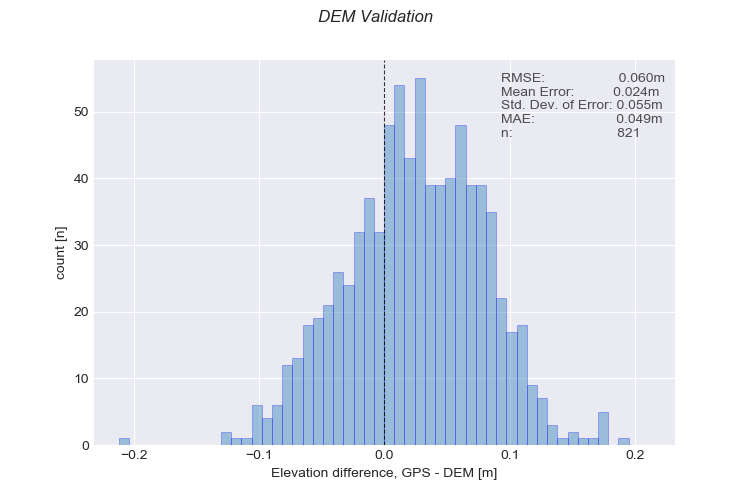

In [14]:
fig_err_dist = plot_error_dist(valdf)

### Plot map with hillshade of DEM and check point residuals by color:

<IPython.core.display.Javascript object>


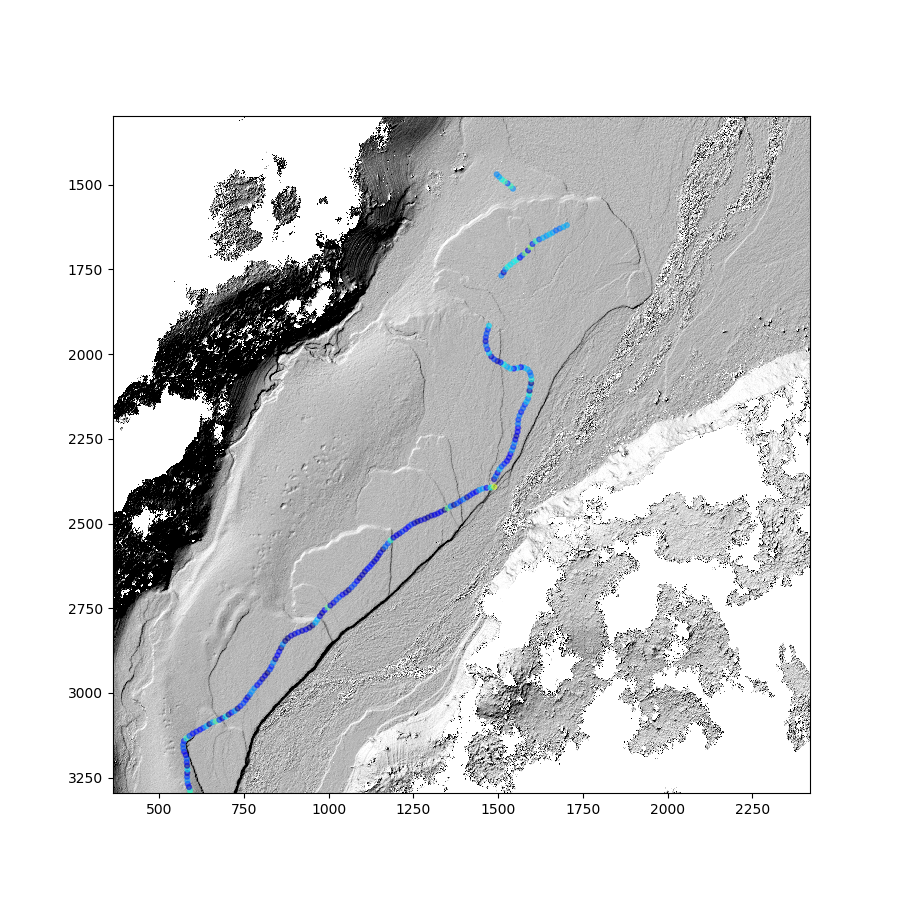

In [15]:
fig_map = plot_map(dem,valdf)